In [25]:
import csv
import datetime

def finddate(d, before_or_after):
    current = datetime.datetime.today()
    numdays = datetime.timedelta(days=d)
    if before_or_after == 'before':
        new_date = current - numdays
        new_date = new_date.strftime ('%d/%m/%Y')
    else:
        new_date = current + numdays
        new_date = new_date.strftime ('%d/%m/%Y')        
    return new_date


    

#Function reverses the order of elements in an array
def array_reverse(lst):
    new_lst = lst[::-1]
    return new_lst

#Function calculates the overall average for all data by day and prints out the result
def alltimeaverage(array):
    while i < len(array):
        i += 1
        sub = array[:i]
        avg = sum(sub)/i
        string = 'Day ' + str(i) + ' average: ' + str(avg)
        print(string)
        
#Function calculates all the (ndays) moving averages and returns them all as an array along with the array showing the day numbers with a (ndays) moving average.
def multidaymovingaverage(array,ndays):
    i = ndays - 1
    days = []
    values = []
    while i < len(array):
        days.append(i)
        sub = array[i-(ndays-1):i]
        avg = sum(sub)/len(sub)
        values.append(avg)
        i += 1
        #print(days)
    return values, days

#Function calculates the rate of change of value y from time value x as percentage of previous value and value change of previous value    
def rate_of_change(y, x):
    a = y[x-1]
    b = y[x]
    c = b - a
    pc = b/a 
    pc -= 1
    pc *= 100
    return c, pc

#The CSV file containing data sourced from the website    
#https://www.covidaustralia.com/wa on 6 March 2022
fcsv = "C:/Users/Azzla/Documents/covidwa_daily_cases.csv"

data = []
with open(fcsv) as file_obj:
    reader_obj = csv.reader(file_obj) 
    for row in reader_obj:
        data.append(row) 

num_lines = len(data)

wa_data = []
num_days = 0
i = 0
for row in data:
    if i > 0:
        val = int(row[1])
        wa_data.append(val)
        num_days += 1
    i += 1

yes_no = input('Enter new data?\nY for yes, any other character for no\n')
if yes_no == 'Y' or yes_no == 'y':
    new_value = input('Enter todays count: ')
    new_value = int(new_value)
    wa_data.append(new_value)
else:
    print('That answer will be accepted as NO!')

a = wa_data
num_days = len(a)

#5 day moving average
v5, d5 = multidaymovingaverage(a,5)
#3 day moving average
v3, d3 = multidaymovingaverage(a,3)
#7 day moving average
v7, d7 = multidaymovingaverage(a,7) 


x5 = len(v5) - 1 
x3 = len(v3) - 1 
x7 = len(v7) - 1 

#Getting index position of last value in array
x = num_days - 1

#Finding the daily number change from yesterday (c) and the percentage change from yesterday(pc)
c, pc = rate_of_change(a, x)
#Find the daily number change from yesterday and percentage change for all moving averages
c3, pc3 = rate_of_change(v3, x3)
c5, pc5 = rate_of_change(v5, x5)
c7, pc7 = rate_of_change(v7, x7)

#Finding the last index value for the moving average arrays
n3 = len(v3)
n5 = len(v5)
n7 = len(v7)
print('RESULTS')
print('Day ' + str(len(a)))
print('Daily cases reported: ' + str(a[x]))
print('Change from yesterday: ' + str(c))
print('3 day moving average: ' + str(v3[n3-1]))
print('Change from yesterday: ' + str(c3))
print('5 day moving average: ' + str(v5[n5-1]))
print('Change from yesterday: ' + str(c5))
print('7 day moving average: ' + str(v7[n7-1]))
print('Change from yesterday: ' + str(c7))

print('Daily Record: ')
day_of_record = -1
record = max(wa_data)
for i in range(num_days):
    if wa_data[i] == record:
        day_of_record = i+1

num_days = x

print(str(record) + ' cases ' + str(num_days) + ' days after the first ever recorded Covid case.')

d = num_days - day_of_record
date_of_record = finddate(d, 'before')         
print("Day record set: " + str(date_of_record))

current_date = finddate(0, 'before')           
print("Date last updated: " + str(current_date))




Enter new data?
Y for yes, any other character for no
n
That answer will be accepted as NO!
RESULTS
Day 840
Daily cases reported: 15565
Change from yesterday: -1105
3 day moving average: 16851.5
Change from yesterday: 2140.0
5 day moving average: 14121.75
Change from yesterday: 1980.75
7 day moving average: 12412.833333333334
Change from yesterday: 1223.6666666666679
Daily Record: 
17033 cases 839 days after the first ever recorded Covid case.
Day record set: 12/05/2022
Date last updated: 13/05/2022


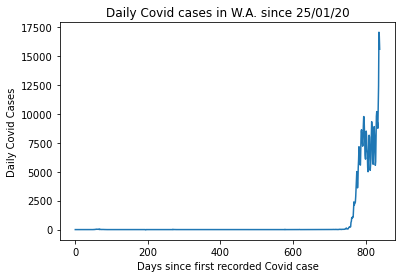

In [26]:
import matplotlib.pyplot as plt

days = []
i = 0
while i < len(a):
    days.append(i)
    i += 1
plt.plot(days, a)
plt.xlabel("Days since first recorded Covid case")
plt.ylabel("Daily Covid Cases")
plt.title("Daily Covid cases in W.A. since 25/01/20")
plt.show()

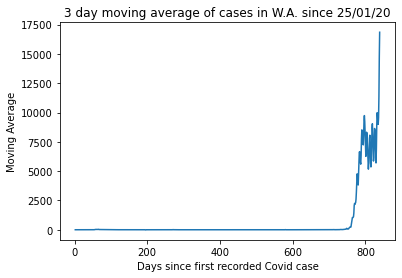

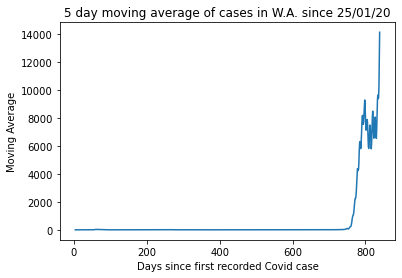

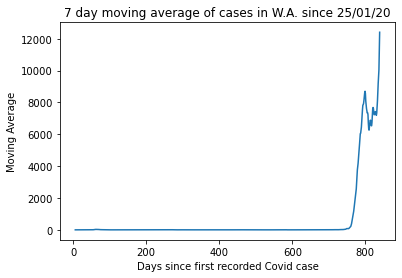

In [27]:
folder = 'C:/Users/Azzla/Documents/'
#Plot 3 day average over all time (since 25 January 2020)
plt.plot(d3, v3)
plt.xlabel("Days since first recorded Covid case")
plt.ylabel("Moving Average")
plt.title("3 day moving average of cases in W.A. since 25/01/20")
plt.show()
#plt.savefig(folder + "3dy_ma_alltime.jpg")

#Plot 5 day average over all time (since 25 January 2020)
plt.plot(d5, v5)
plt.xlabel("Days since first recorded Covid case")
plt.ylabel("Moving Average")
plt.title("5 day moving average of cases in W.A. since 25/01/20")
plt.show()
#plt.savefig(folder + "5dy_ma_alltime.jpg")

#Plot 7 day average over all time (since 25 January 2020)
plt.plot(d7, v7)
plt.xlabel("Days since first recorded Covid case")
plt.ylabel("Moving Average")
plt.title("7 day moving average of cases in W.A. since 25/01/20")
plt.show()
#plt.savefig(folder + "7dy_ma_alltime.jpg")

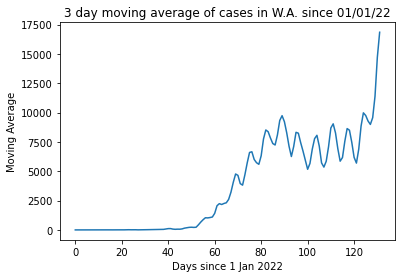

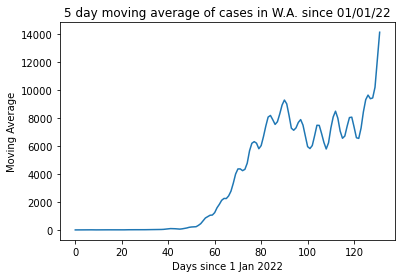

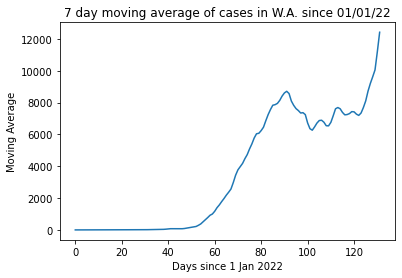

In [28]:
from datetime import datetime
import pandas as pd

str_d1 = '2022/1/1'
current = datetime.today()

# convert string to date object
d1 = datetime.strptime(str_d1, "%Y/%m/%d")

# difference between dates in timedelta
delta = current - d1

folder = 'C:/Users/Azzla/Documents/'
#Number of days from 1/01
n = delta
#print(n)
timedelta = pd.Timedelta(n)
#print(timedelta)
n = timedelta.days

#Find the day number at 31 December 2021
daynumberat31dec21 = d3[-n]
#Plot 3 day average over all time (since 1 January 2022)
days3dy = d3[-n:]
for i in range(len(days3dy)):
    days3dy[i] = days3dy[i] - daynumberat31dec21
    
cases3dy = v3[-n:]
plt.plot(days3dy, cases3dy)
plt.xlabel("Days since 1 Jan 2022")
plt.ylabel("Moving Average")
plt.title("3 day moving average of cases in W.A. since 01/01/22")
plt.show()
#plt.savefig(folder + "3dy_ma_2022.jpg")

#Plot 5 day average over all time (since 1 January 2022)
days5dy = d5[-n:]
for i in range(len(days5dy)):
    days5dy[i] = days5dy[i] - daynumberat31dec21
    
cases5dy = v5[-n:]
plt.plot(days5dy, cases5dy)
plt.xlabel("Days since 1 Jan 2022")
plt.ylabel("Moving Average")
plt.title("5 day moving average of cases in W.A. since 01/01/22")
plt.show()
#plt.savefig(folder + "5dy_ma_2022.jpg")

#Plot 7 day average over all time (since 1 January 2022)
days7dy = d7[-n:]
for i in range(len(days7dy)):
    days7dy[i] = days7dy[i] - daynumberat31dec21
    
cases7dy = v7[-n:]
plt.plot(days7dy, cases7dy)
plt.xlabel("Days since 1 Jan 2022")
plt.ylabel("Moving Average")
plt.title("7 day moving average of cases in W.A. since 01/01/22")
plt.show()
#plt.savefig(folder + "7dy_ma_2022.jpg")

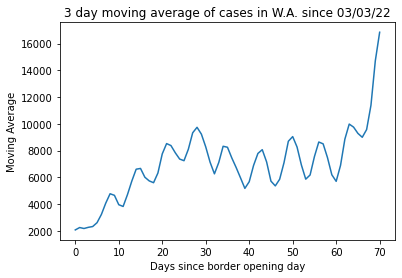

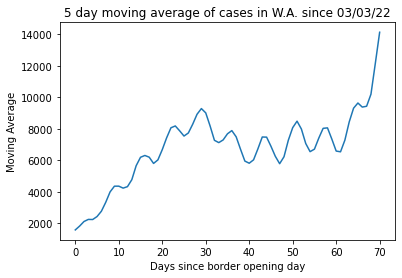

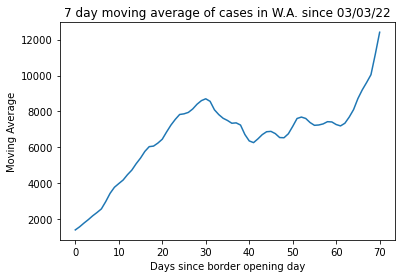

In [29]:
import matplotlib.pyplot as plt
from datetime import datetime

str_d1 = '2022/3/3'
current = datetime.today()

# convert string to date object
d1 = datetime.strptime(str_d1, "%Y/%m/%d")

# difference between dates in timedelta
delta = current - d1

folder = 'C:/Users/Azzla/Documents/'
#Number of days from 1/03
n = delta
#print(n)
timedelta = pd.Timedelta(n)
#print(timedelta)
n = timedelta.days

#Find the day number at 2 March 2022
daynumberat3mar22 = d3[-n]
#Plot 3 day average over all time (since 3 March 2022)
days3dy = d3[-n:]
for i in range(len(days3dy)):
    days3dy[i] = days3dy[i] - daynumberat3mar22
    
cases3dy = v3[-n:]
plt.plot(days3dy, cases3dy)
plt.xlabel("Days since border opening day")
plt.ylabel("Moving Average")
plt.title("3 day moving average of cases in W.A. since 03/03/22")
plt.show()

#Plot 5 day average over all time (since 3 March 2022)
days5dy = d5[-n:]
for i in range(len(days5dy)):
    days5dy[i] = days5dy[i] - daynumberat3mar22
    
cases5dy = v5[-n:]
plt.plot(days5dy, cases5dy)
plt.xlabel("Days since border opening day")
plt.ylabel("Moving Average")
plt.title("5 day moving average of cases in W.A. since 03/03/22")
plt.show()

#Plot 7 day average over all time (since 3 March 2022)
days7dy = d7[-n:]
for i in range(len(days7dy)):
    days7dy[i] = days7dy[i] - daynumberat3mar22
    
cases7dy = v7[-n:]
plt.plot(days7dy, cases7dy)
plt.xlabel("Days since border opening day")
plt.ylabel("Moving Average")
plt.title("7 day moving average of cases in W.A. since 03/03/22")
plt.show()

In [30]:
#Write all stats to CSV file for backup
import csv
import datetime
import pandas as pd

def finddateaftersetdate(date, d):
    date = datetime.datetime.strptime(date, '%d/%m/%Y')
    d = datetime.timedelta(days=d)
    newdate = date + d
    newdate = newdate.strftime('%d/%m/%Y')
    return newdate

def finddate(d, before_or_after):
    current = datetime.datetime.today()
    numdays = datetime.timedelta(days=d)
    if before_or_after == 'before':
        new_date = current - numdays
        new_date = new_date.strftime ('%d/%m/%Y')
    else:
        new_date = current + numdays
        new_date = new_date.strftime ('%d/%m/%Y')        
    return new_date
  
start_date = finddate(num_days, 'before') 
print('Start date')
print(start_date)

output_csv = "C:/Users/Azzla/Documents/covid_wa_daily_cases_new.csv"
dates = []
num_days = len(wa_data)
three_day_averages = []
five_day_averages = []
seven_day_averages = []
day_count = 0
i3 = 0
i5 = 0
i7 = 0

oid = open(output_csv, 'w')
oid.write('Date, Daily Cases, 3 Day Average, 5 Day Average, 7 Day Average\n')
while day_count < num_days:
    if day_count in d3:
        three_day_averages.append(v3[i3])
        i3 += 1
    else:
        three_day_averages.append('Not Applicable')
    if day_count in d5:
        five_day_averages.append(v5[i5])
        i5 += 1
    else:
        five_day_averages.append('Not Applicable')
    if day_count in d7:
        seven_day_averages.append(v7[i7])
        i7 += 1
    else:
        seven_day_averages.append('Not Applicable')
    if day_count == 0:
        new_date = start_date
    else:
        new_date = finddateaftersetdate(start_date, day_count)
    dates.append(new_date)
    oid.write(str(new_date) + ',' + str(wa_data[day_count]) + ',' + str(three_day_averages[day_count]) + ',' + str(five_day_averages[day_count]) + ',' + str(seven_day_averages[day_count]))
    oid.write('\n')
    day_count += 1

oid.close()


Start date
25/01/2020
